### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import pickle

### Load preprocess data from Notebook 01_Modeling

In [2]:
df = pd.read_csv("../data/mbti_processed.csv")
df.head()

,processed,IE
0,moment sportscenter top ten play prank life c...,I
1,finding lack post alarming sex boring position...,E
2,good one course say know blessing curse absolu...,I
3,dear enjoyed conversation day esoteric gabbin...,I
4,fired another silly misconception approaching ...,E


### Load Logistic Regression model & Vectorizer

In [3]:
with open("../model/lr_model.pkl", "rb") as f:
    lr = pickle.load(f)
print(lr)

with open("../model/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)
print(type(tfidf))

LogisticRegression(class_weight='balanced', max_iter=2000)
<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


### Distribution of IE class

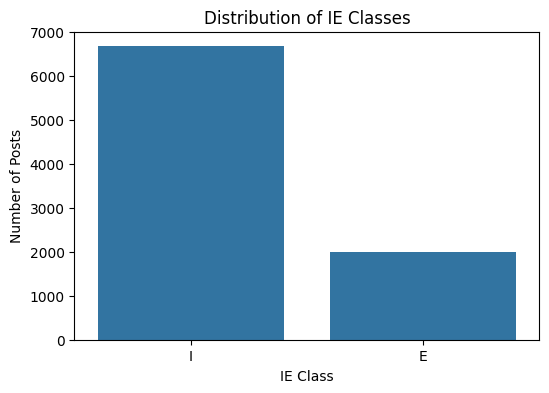

In [4]:
df['IE'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(x='IE', data=df)
plt.title("Distribution of IE Classes")
plt.xlabel("IE Class")
plt.ylabel("Number of Posts")
plt.show()

**Insights**   
The graph shows that class I is more frequent than class E, so the data is imbalanced. This is why I use class_weight='balanced' when training the Logistic Regression model to help the model learn both classes equally.

### Top words per IE

In [5]:
lr.classes_

array(['E', 'I'], dtype=object)

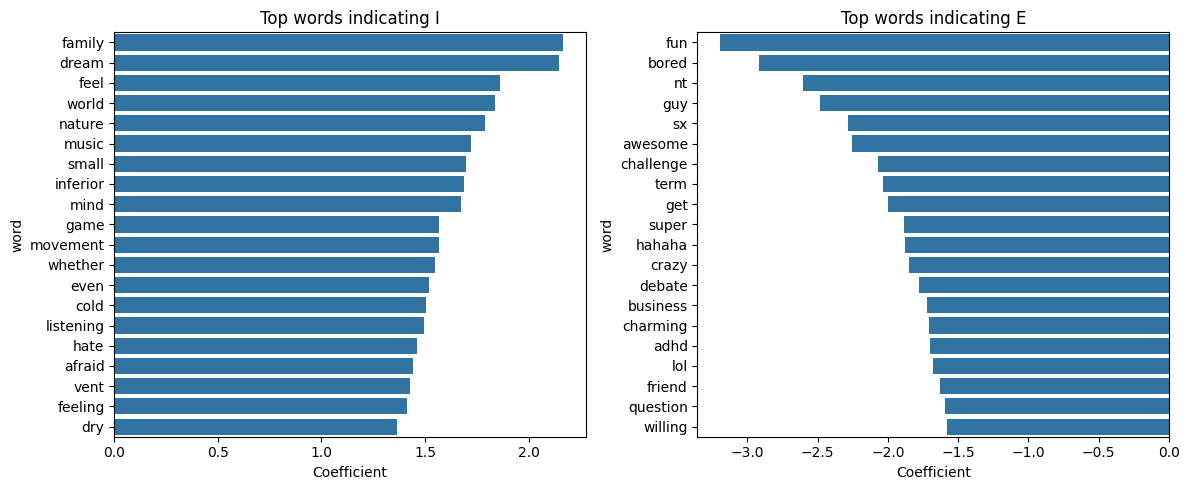

In [6]:
feature_names = tfidf.get_feature_names_out()
coef = lr.coef_[0]  

coef_df = pd.DataFrame({
    'word': feature_names,
    'coef': coef
})

top_I = coef_df.sort_values('coef', ascending=False).head(20)
top_E = coef_df.sort_values('coef', ascending=True).head(20)

plt.figure(figsize=(12,5))

# Top I words
plt.subplot(1,2,1)
sns.barplot(x='coef', y='word', data=top_I)
plt.title("Top words indicating I")
plt.xlabel("Coefficient")

# Top E words
plt.subplot(1,2,2)
sns.barplot(x='coef', y='word', data=top_E)
plt.title("Top words indicating E")
plt.xlabel("Coefficient")

plt.tight_layout()
plt.show()

### Confusion Matrix

#### Preparation for Confusion Matrix 

In [7]:
df = df.dropna(subset=["processed"])
df["processed"].isna().sum()

np.int64(0)

In [8]:
# Split X, y for Confusion Matrix
X = df["processed"]
y_true = df["IE"]

X_tfidf = tfidf.transform(X)

y_pred = lr.predict(X_tfidf)

#### Generate Confusion Matrix

In [9]:
cm = confusion_matrix(y_true, y_pred, labels=["E","I"])
cm

array([[1642,  357],
       [1183, 5492]])

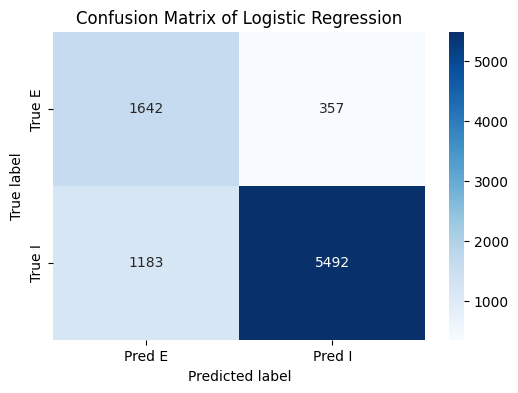

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Pred E","Pred I"],
            yticklabels=["True E","True I"])

plt.title("Confusion Matrix of Logistic Regression")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [11]:
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           E      0.581     0.821     0.681      1999
           I      0.939     0.823     0.877      6675

    accuracy                          0.822      8674
   macro avg      0.760     0.822     0.779      8674
weighted avg      0.857     0.822     0.832      8674



### Demo Prediction

In [20]:
from preprocess_utils import full_preprocess

def predict_IE(text):
    processed = full_preprocess(text)
    vec = tfidf.transform([processed])
    pred = lr.predict(vec)[0]
    prob = lr.predict_proba(vec)[0]
    return pred, prob

user_input = input("Type anything: ")

pred, prob = predict_IE(user_input)

print("Prediction (E/I):", pred)
print("Probability [E, I]:", prob)

Type anything:  Large crowds make me exhausted, I prefer small groups


Prediction (E/I): I
Probability [E, I]: [0.1783 0.8217]
